In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
data = pd.read_csv("Data/cars_data.csv")
data.head(2)

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10


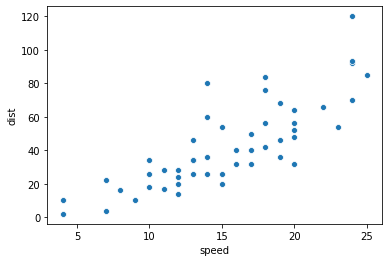

In [3]:
x = data['speed'] 
y = data['dist']
sns.scatterplot(x, y)

In [4]:
import statsmodels.api as sm
# df = pd.DataFrame(list(zip(x, y)), columns =['x', 'y'])
ols = sm.OLS.from_formula('y~x', data)
ols_result = ols.fit()
print(ols_result.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.49e-12
Time:                        09:00:11   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
x

## R2 and Adjusted R2
### Dergree of Freedom

Degree of Freedom refers to the number of observations free to vary while estimating the parameters. The number of independent data that you can use to estimate the parameter.

Ex : Suppose u have a list = [1, 4, x, 5] and the mean of the list is 5. Then we can estimate the x. As 15 + x = 4*5. The value X has no option to vary and it cant take any other value. After estimating the mean, we have only n - 1 dof (independent pieces of information).

DoF in Regression :       
1. In regression, the DoF is n - k (k is number of coefficients including the intercept). The degrees of freedom are the independent pieces of information that are available for estimating your coefficients. For precise coefficient estimates and powerful hypothesis tests in regression, you must have many error degrees of freedom, which equates to having many observations for each model term.    
2. As you add terms to the model, the error degrees of freedom decreases. You have fewer pieces of information available to estimate the coefficients. This situation reduces the precision of the estimates and the power of the tests. When you have too few remaining degrees of freedom, you can’t trust the regression results. If you use all your degrees of freedom, the procedure can’t calculate the p-values.

**R2**:   
1. The R-Squared Statistic provides a proportion measure and is independent of the scale of Y. R squared measures the proportion of variability in Y that can be explained using X. This statistic has an advantage that it puts up values between 0 and 1.    
2. Without any predictors, you have the basic prediction of mean of Y (where the variablity in prediction is limited). By adding Xs, our prediction capability increases and eventually the vairability explained in prediction Y increases. That is R2.  
$$ R^2 = 1 - \frac{Residuals Sum of Squares}{Total Sum of Squares}$$
$$ R^2 = 1 - \frac{\sum (y - \hat y)^2} {\sum (y - \bar y)^2}$$     
3. The numerator explains the error reduced with adding predictors. Denominator error would be big as it doesnt build any predictor.    
4. **__Beware values are sum of squares and not RMSE or MSE__**      

The "Proportion of variance explained (R2)'' indicates how much better the function predicts the dependent variable than just using the mean value of the dependent variable.  This is also known as the "coefficient of multiple determination.''  It is computed as follows: Suppose that we did not fit an equation to the data and ignored all information about the independent variables in each observation.  Then, the best prediction for the dependent variable value for any observation would be the mean value of the dependent variable over all observations.  The "variance'' is the sum of the squared differences between the mean value and the value of the dependent variable for each observation.  Now, if we use our fitted function to predict the value of the dependent variable, rather than using the mean value, a second kind of variance can be computed by taking the sum of the squared difference between the value of the dependent variable predicted by the function and the actual value.  Hopefully, the variance computed by using the values predicted by the function is better (i.e., a smaller value) than the variance computed using the mean value.  The "Proportion of variance explained'' is computed as 1 – (variance using predicted value / variance using mean).  If the function perfectly predicts the observed data, the value of this statistic will be 1.00 (100%).  If the function does no better a job of predicting the dependent variable than using the mean, the value will be 0.00. 

   
**Adjusted R2**:   
1. Mainly to penalize the addition of variables in regression
$$ AdjustedR^2 = 1 - \frac{\frac{\sum (y - \hat y)^2}{n - k - 1}} {\frac{\sum (y - \bar y)^2}{n - 1}}$$     
2. The derivation is intuitive. If you look into numerator which is sse with predictors the dof is (n - k - 1). As there is a target variables while calculating sse. Similarly the dof when building only with ymean is (n - 1), as k = 0 (no predictors).             
3. Think of dof as :  number of equations and number of variables. In our example of 50 observations, it is difficult to get close form solution with 2 variables(m, c). Ideally we would want 50 Xs. In the same manner, while predicting sse with Xs, the dof freedom is (n - k - 1), where the -1 is for intercept. Dof with ymean is N-1, where the -1 is the constant ymean. 

In [6]:
# R2 & Adjusted R2
c, m  = ols_result.params.values
ypred = m*data['speed'] + c
sse = np.sum((y - ypred)**2)   ## Error with X
sst = np.sum((y - np.mean(y))**2)   ## Error without X; basically with just ymean 
r2 = round(1 - sse/sst, 3)
print(f"r2 : {r2}")

# Adjusted R2
n = data.shape[0]
k = 1
adj_r2 = round(1 - (sse/(n-k-1))/(sst/(n-1)),3)
print(f"Adjustedr2 :  {adj_r2}")

r2 : 0.651
Adjustedr2 :  0.644


## Residual  Standard Error (RSE) of estimate

   
1. Residual Standard Error is measure of the quality of a linear regression fit. Theoretically, every linear model is assumed to contain an error term E. Due to the presence of this error term, we are not capable of perfectly predicting our response variable (dist) from the predictor (speed) one. The Residual Standard Error is the average amount that the response (dist) will deviate from the true regression line. In our example, the actual distance required to stop can deviate from the true regression line by approximately 15.3795867 feet, on average. In other words, given that the mean distance for all cars to stop is 42.98 and that the Residual Standard Error is 15.3795867, we can say that the percentage error is (any prediction would still be off by) 35.78%. It’s also worth noting that the Residual Standard Error was calculated with 48 degrees of freedom. Simplistically, degrees of freedom are the number of data points that went into the estimation of the parameters used after taking into account these parameters (restriction). In our case, we had 50 data points and two parameters (intercept and slope).    
2. Residual Standard Error is an estimate of the standard deviation of the error associated with each prediction term. It is the average amount that the response will deviate from the true regression line. The RSE is considered as a measure of the lack of fit. It provides an absolute measure for this in terms of Y’s unit.   
3. When the residual standard error is exactly 0 then the model fits the data perfectly (likely due to overfitting).   
4. RSE is in the same units as the target. So it gives clear indication of how much the deviation is. But R2 is unit independent and is always between 0-1  
$$ RSE = \sqrt {\frac {(y - \hat y)^2} {N - 2}}$$     
5. In general,  $$ RSE = \sqrt {\frac {(y - \hat y)^2} {N - k - 1}}$$    
6. Models with more variables can have high RSE if there is not much decrease in RSS. 

![alt text](Images\RSE_R2.png "RSE_R2")

The difference between the RSE and the R2 is that the RSE tells you something about the inaccuracy of the model (in this case the regression line) given the observed data. The R2 on the other hand tells you how much variation is explained by the model (i.e. the regression line) relative the variation that was explained by the mean alone (i.e. the simplest model).

In [7]:
## RSE
c, m = ols_result.params.values
y_pred = m*x + c
error_sq = np.square(y - y_pred)
rse = round(np.sqrt(np.sum(error_sq)/(len(x)-2)), 2)
print(f"RSE : {rse}")

RSE : 15.38


## AIC BIC Log-Likelihood



__**AIC BIC Log-Likelihood**__    

1. They are methods used for model selection. A common approach would be to choose model which performs better in kfold cross validation. But AIC, BIC provides an alternate approach which looks not only at model performance but also at model complexity.    
2. The benefit of these information criterion statistics is that they do not require a hold-out test set, although a limitation is that they do not take the uncertainty of the models into account and may end-up selecting models that are too simple. The AIC/BIC can give high penalty and can make us choose simpler model.
3. These methods fall under probabilistic model selection (bcos it uses log-Likelihood).     
    Model Performance : Log- likelihood (mse)     
    Model Complexity : Interms of number of degrees of freedom/parameters in model
4. Log-Likelihood: It is derived from Max Likelihood.     
    Max Likelihood Estimate = P(X : theta) ie, maximise the conditional probability of observing X given the parameters theta.      
    The above eq can be expanded as P(x1, x2,..xn : theta). The joint prob can be restated as the multiplication of conditional prob of each example.         
    It can also be written as summation (log(P(xi : theta)))        
    It is mostly the MSE or Log-loss for regression & classification prob respectively.         
5. Akaike Information Criteria:
    Method of selecting and scoring a models
    $$ AIC = -2*loglikelihood + 2*k $$
    k = number of parameters in model (including intercept). Choose model with lowest AIC.
6. Bayesian Information Criteria:
    $$ BIC = -2*loglikelihood + log(N)*k $$
    where N is number of examples. Log is natural log with base-e. 
    The BIC penalizes the model more and thus it chooses simpler model compared to AIC based model.


_**Note**_:
1. Not able to correcly calculate the likelihood data as -206.58?    



### Understanding Likelihood & Maximum Likelihood        
1. Maximum likelihood estimation(MLE) is a popular mechanism which is used to estimate the model parameters of a regression model    
2. In general, it can be used to estimate parameters in any distributions. (Guassian, Binomial, etc). In real life scenarios, the mean and std dev are unknown and needs to be estimated from data. MLE helps to estimate the parameters that best describes the given data.     
3. Given a sample [1, 2, 3, 4]. You could probably estimate the mean & std dev straight away(mean = 2.5, std dev = 1). But they are a good representation of given data but may not best to describe the population.     
4. MLE can be defined as a method for estimating population parameters (such as the mean and variance for Normal, rate (lambda) for Poisson, etc.) from sample data such that the probability (likelihood) of obtaining the observed data is maximized.
  
5. Given some distribution parameters, we know some data values are momre probable to occur than other data. For ex, for guassian, values around mean are more probable. In reality, we have observed the data, now in inverse problem, whats the likelihood function : L(parameters | x).


6. . likelihood & Probability
    Likelihood and Probability are two different things although they look and behaves same.    
        a. L(parameters | x): likelihood of having these parameters, once the data are these. That is we are going to guess the model parameters from the data.          
        b. probability P(x | parameters) : when we know the model parameters and when predicting a value from that model. So there we talk about how probable is the resultant value to be come out from that model. 



Bcos we are finding the given the data, what prob function would have most likely produced that data.
$$ L(\theta ; x) = \prod f(x | \theta)$$
$$ L(\theta ; x) = f(x_1 | \theta). f(x_2 | \theta)...f(x_n | \theta)$$
ie, we can check the likelihood of having mean = 2.5, std dev = 1 in above example by
$$ L(\mu = 2.5, \sigma^2 = 1| x = 1,2,3,4) = pdf(x=1).pdf(x=2).pdf(x=3).pdf(x=4) $$
$$ L(\mu = 2.5, \sigma^2 =1 | x = 1,2,3,4) = pdf(x=1).pdf(x=2).pdf(x=3).pdf(x=4) $$
$$ pdf = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\frac{-(x - \mu)^2}{2\sigma^2}}$$
$$ L(\mu = 2.5, \sigma^2 =1 | x = 1,2,3,4) = some value $$
This can be compared against other probable values for mean & std. High likelihood is better. But in math, this can be solved using derivations and precise values for parameters are obtained. The partial derivative is taken against the parameters and equated to zero to obtain the parameters.

To make the L equation easily differentiable, we take log (natural log with base-e) on both sides. Adv it makes the product of pdfs (in RHS into sums). it makes exp(x) into x. Also log is monotonic(it increases along the value), so there is no harm choosing between gradient of L and log(L). 

$$ log (L(\mu = 2.5, \sigma^2 = 1| x = 1,2,3,4)) = \log {(\frac{1}{\sqrt{2\pi\sigma^2}}^4)} + \log ({\exp{\frac{-(1 - \mu)^2}{2\sigma^2}}}) + \log ({\exp{\frac{-(2 - \mu)^2}{2\sigma^2}}}) + \log ({\exp{\frac{-(3 - \mu)^2}{2\sigma^2}}}) + \log ({\exp{\frac{-(4 - \mu)^2}{2\sigma^2}}})$$

The above eq shall be simplified and solved for mean and sigma. 
$$ RHS = -4\log (\sqrt{2\pi\sigma^2}) - \frac{-(1 - \mu)^2}{2\sigma^2} -\frac {-(2 - \mu)^2}{2\sigma^2} -  \frac{-(3 - \mu)^2}{2\sigma^2} - \frac{-(4 - \mu)^2}{2\sigma^2}  $$

$$ \frac {\partial log(L)}{\partial \mu} = \frac {\partial RHS}{\partial \mu} $$

$$ \frac {\partial log(L)}{\partial \sigma} = \frac {\partial RHS}{\partial \sigma} $$

The both equations are solveable & we get precise unique solution.
$$ Log likelihood = -\frac{n}{2}\log(2\pi) - \frac{n}{2}\log(\sigma^2) - \frac {1}{2\sigma^2}\sum{(x_i - \mu)^2} $$

### MLE in Linear Regression
Things to keep in mind:    
1. MLE can estimate the parameters given the data.
2. But we need to know what kind of distributions to use?    
Remember the target variable is assumed to follow normal distribution. 
$$ \hat y = w_0 + w_1*x_1 + .. w_n*x_n $$
Here the mean is not a single value but the prediction from model itself. So the mean varies as the input x varies. Basically along the regression line. So at each point on the line, we can have a prob curve which can itself have probable mean & std.
$$ \hat {Y}_{n*1} = {X}_{n*d} * {W}_{d*1} $$
$$ L(XW, \sigma^2|x) = \prod f(y_i, x_iw, \sigma^2)$$
$$ L(XW, \sigma^2|x) = \prod \frac{1}{\sqrt{2\pi\sigma^2}} \exp {\frac{-(y_i - x_iw)^2}{2\sigma^2}}$$
When u solve this for mean and std dev we arrive at the linear reg solution
$$ W = (X^TX)^{-1} X^TY $$


In [8]:
mu = x.mean()
sigma = x.std()
n = len(x)
log_lhd = -n/2*np.log(2*np.pi) - n/2*np.sqrt(sigma**2)
for i in x:
    log_lhd += -(i - mu)**2/(2*sigma**2)
print(f"Log Likelihood : {log_lhd}")

Log Likelihood : -202.6380375411033


In [9]:
# Assuming Log-Likelihood = -206.58
## AIC
log_likelihood = -206.58
k = 2
aic = -2*log_likelihood + 2*k
bic = -2*log_likelihood + 2*np.log(data.shape[0])
print(f" aic : {aic}, bic : {bic}")

aic : 417.16, bic : 420.98404601085633


## F statistics

1. F-statistic is more of hypothesis testing, where we test the significance of the predictor variables in the model. Are the predictor variables really useful in explaining the variances. The null hypothesis is all the predictor coefficients are zero & alternate hypothesis is atleast one of the predictor coefficients is non-zero. You build two models: one with all predictor variables and one without them(only intercept term). F-stat is basically the ratio of two variances thro these methods. Fstat is more at model level importance.
2. Forumula fstat $$ \frac {\frac{SSE_{rr} - SSE_{ur}}{k}} {\frac{SSE_{ur}}{n - k - 1}}$$
3. SSE_ur is the sum of squared error with all predictor model. SSE_rr is sum of sqaured error with no predictor but only intercept.
4. The numerator will always be positive as  the error will be lower when we include predictors. The denominator is mainly kept to normalize the f-stat as a constant and rather not to have any units associated.
5. Once fstat is calculated, we need to look for critical Fvalue from fdistribution table. Lets say, we have 200 rows and 3 Xs. We have 2 Fs : F3, F196. There will be a fdist table with a value against F3, F196. If our calculated Fstat > Fcritical found from table. Then reject H0 hypothesis and conclude that predictor variables are significant.
6. It also makes sense if the numerator is positive that the error is reduced with addition of Xs.
7. In the exmaple : df1, df48 are the degrees of freedom of numerator and denominator respectivetly. numerator has one dof & denominator has 48 assuming k is equal to 1 (excluding intercept). In Ftable,
 the row values are for denominator and column values are for numerator. Get the value corresponding to pvalue(preferrably 0.05) & compare against calculated value of 89.56. Then accordingy reject/accept H0.     

**Prob (F-Statistic)**   
1. The value of Prob(F) is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero).  For example, if Prob(F) has a value of 0.01000 then there is 1 chance in 100 that all of the regression parameters are zero.  This low a value would imply that at least some of the regression parameters are nonzero and that the regression equation does have some validity in fitting the data (i.e., the independent variables are not purely random with respect to the dependent variable). 
2. It is calculated using fvalue, df1, df48 and critical value of f.   


In [10]:
#  fstat
k = 1
sse_rr = np.sum((y - np.mean(y))**2)
sse_ur = np.sum((y - ypred)**2)
fstat_numerator = (sse_rr - sse_ur)/(k)
fstat_denominator = sse_ur/(n - k - 1)
fstat = fstat_numerator/fstat_denominator
print(f"fstat : {fstat}") 

fstat : 89.56710653646776


## Coefficient Standard Error & Tvalue & pvalue & Confidence Interval

When you run several runs with samples & estimate the coefficients m, c their average over all those runs might be very close the population m, c. To indicate how close, standard error can be looked at. The standard error of mean of Y is 

1. Standard error tells how close the predicted coefficients are to the true coefficients. Smaller the SE, lower is the deviation. 
2. It decreases as N increases.
$$ Standard  Error,  SE(m, c) = (X^T * X)^{-1} * \frac{\sum (y - \hat y)^2}{(N - p)} $$
3. SE can be used to perform hyp testing to know if there exists relationship btw X & Y.
4. It is used to estimate the confidence intervals and pvalues (feature importance). Confidence interval in having the true unknown value of coefficients. Ex : 95% confidence interval range is the range of values such that 95% prob the range will contain the true unknown value of coefficients.
$$ Confidence Interval = m +- 2* SE(m) $$
$$ Confidence Interval = [m - 2* SE(m), m + 2* SE(m)] $$
5. T statistics
$$ tvalue = \frac {coefficient}{SE_coefficient} $$

6. tvalue says the number of std deviations the coefficients (m, c) are away from zero,indicating the coefficient importance and not being zero. So the tvalue can be higher than coefficient when the SE is lower.  If small pvalue is being observed from tstat, then u reject the null hyp that no relationship betw X & Y and conclude there exists a relationship.

In [11]:
## Standard Error Calculation
N = len(x)
p = 1 + 1 # include the intercept as well
X = np.empty(shape=(N, p))
X[:, 0] = 1 # Intercept
X[:,1:p] = data['speed'].values.reshape(-1,1) # Adding X values 
# coeff = np.linalg.inv(np.matmul(X.T, X))@X.T@y.values

c, m  = ols_result.params.values
ypred = m*data['speed'] + c
residuals = y.values - ypred
residuals_sum_of_squares = residuals.T @ residuals # @ is matrix multiplication
sigma_sq = residuals_sum_of_squares/ (N - p)
var_beta = np.linalg.inv(X.T @ X)*sigma_sq
standard_error = []
for i in range(p):
    standard_error.append(round(var_beta[i,i]**0.5, 3))
    print(f"Standard Error {i} : {standard_error[i]}")

# Confidence Interval
conf_interval_m = [m - 2*standard_error[1], m + 2*standard_error[1]]
conf_interval_m = list(map(np.round, conf_interval_m))
conf_interval_c = [c - 2*standard_error[0], c + 2*standard_error[0]]
conf_interval_c = list(map(np.round, conf_interval_c))

print(f"Confidence Interval c : {conf_interval_c}")
print(f"Confidence Interval m : {conf_interval_m}")

## Tvalue
tvalue_m = round(m/standard_error[1], 2)
tvalue_c = round(c/standard_error[0], 2)
print(f"t value c : {tvalue_c}")
print(f"t value m : {tvalue_m}")

## pvalue
from scipy import stats
pvalue_m = 2 * (1 - stats.t.cdf(np.abs(tvalue_m), y.shape[0] - X.shape[1]))
pvalue_c = 2 * (1 - stats.t.cdf(np.abs(tvalue_c), y.shape[0] - X.shape[1]))
print(f"p value c : {round(pvalue_c,3)}")
print(f"p value m : {round(pvalue_m,3)}")

Standard Error 0 : 6.758
Standard Error 1 : 0.416
Confidence Interval c : [-31.0, -4.0]
Confidence Interval m : [3.0, 5.0]
t value c : -2.6
t value m : 9.45
p value c : 0.012
p value m : 0.0
